In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df1 = df[['InvoiceNo', 'InvoiceDate']]
df1 = df1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
df1 = df1.set_index(['InvoiceDate'])
df2 = df1.loc['2011']
df2 = df2.reset_index()
df3 = df2.groupby(by=df2['InvoiceDate'].dt.date).count()

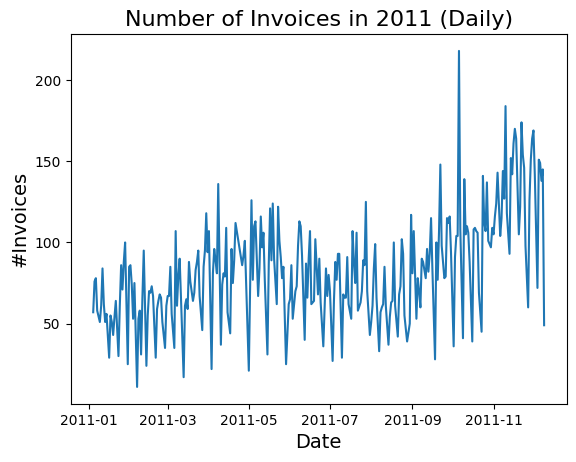

In [11]:
x = df3.index.get_level_values(0)
plt.plot(x,df3["InvoiceDate"])
plt.title("Number of Invoices in 2011 (Daily)", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("#Invoices", fontsize = 14)
plt.show()

In [12]:
df4 = df2.groupby(by=df2["InvoiceDate"].dt.month).count()
df4

,InvoiceDate,InvoiceNo
InvoiceDate,,
1,1476,1476
2,1393,1393
3,1983,1983
4,1744,1744
5,2162,2162
6,2012,2012
7,1927,1927
8,1737,1737
9,2327,2327


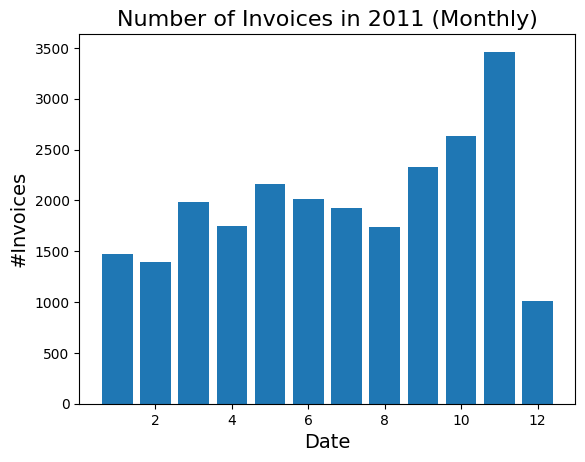

In [14]:
y = df4.index.get_level_values(0)
plt.bar(y, df4["InvoiceDate"])
plt.title("Number of Invoices in 2011 (Monthly)", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("#Invoices", fontsize = 14)
plt.show()